In [2]:
# Initial Imports
import pandas as pd
import numpy as np
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy

### Getting Data ready for exploratory analysis

In [17]:
# Read in lyrics data
lyrics = pd.read_csv("data/songdata.csv")

In [18]:
# Required columns
cols=['song', 'artist', 'trackid', 'danceability', 'energy', 'key', 'mode', 
      'speechiness', 'acousticness', 'instrumentalness', 'liveness', 
      'valence', 'tempo', 'duration_ms', 'time_signature',
     'duration', 'analysis_sample_rate', 'analysis_channels', 
      'end_of_fade_in', 'start_of_fade_out', 'loudness', 'tempo', 'tempo_confidence', 
      'time_signature', 'time_signature_confidence', 'key', 'key_confidence', 'mode', 'mode_confidence']

In [19]:
cols = list(np.unique(cols))

In [20]:
# Creating dataframe for audio features
features=pd.DataFrame(columns=cols)

In [39]:
# sample dataframe is used for all analysis here on
sample = lyrics.sample(2000)
sample.reset_index(inplace=True)

In [41]:
# Get audio features for the songs in the sample dataframe
# Client Credentials
client_id = "5fc0da4106eb48e1913868f4950828fb"
client_secret = "5a549bc4674e47dfaf3b06da4500a44d"

client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

for index,row in sample.iterrows():
    song = row['song']
    
    temp = pd.DataFrame(columns = cols)
    temp['song'] = [song]
    temp['artist'] = [row['artist']]
    
    try:
        result = sp.search(song, type='track', limit=1)

    except:
        print('e')
        continue
        
    if len(result['tracks']['items']) == 0:
        continue
    
    trackid=result['tracks']['items'][0]['id']
    temp['trackid'] = [trackid]
    
    try:
        feat=sp.audio_features(trackid)[0]
        analysis=sp.audio_analysis(trackid)['track']
    except:
        print('e')
        continue
    
    combined = {**feat, **analysis}
    
    for col in cols:
        if col in ['song', 'artist', 'trackid']:
            continue
        temp[col]= combined[col]
        
    features = features.append(temp, ignore_index=True)

retrying ...1secs
retrying ...2secs
retrying ...3secs
retrying ...4secs
retrying ...5secs
retrying ...6secs
retrying ...7secs
retrying ...8secs
retrying ...9secs
retrying ...10secs
e


In [42]:
features.columns

Index(['acousticness', 'analysis_channels', 'analysis_sample_rate', 'artist',
       'danceability', 'duration', 'duration_ms', 'end_of_fade_in', 'energy',
       'instrumentalness', 'key', 'key_confidence', 'liveness', 'loudness',
       'mode', 'mode_confidence', 'song', 'speechiness', 'start_of_fade_out',
       'tempo', 'tempo_confidence', 'time_signature',
       'time_signature_confidence', 'trackid', 'valence'],
      dtype='object')

In [43]:
c = ['acousticness', 'analysis_channels', 'analysis_sample_rate',
       'danceability', 'duration', 'duration_ms', 'end_of_fade_in', 'energy',
       'instrumentalness', 'key', 'key_confidence', 'liveness', 'loudness',
       'mode', 'mode_confidence', 'speechiness', 'start_of_fade_out',
       'tempo', 'tempo_confidence', 'time_signature',
       'time_signature_confidence', 'trackid', 'valence']

### Data Exploratory Plots 

Text(0.5,1,'Correlation Heatmap')

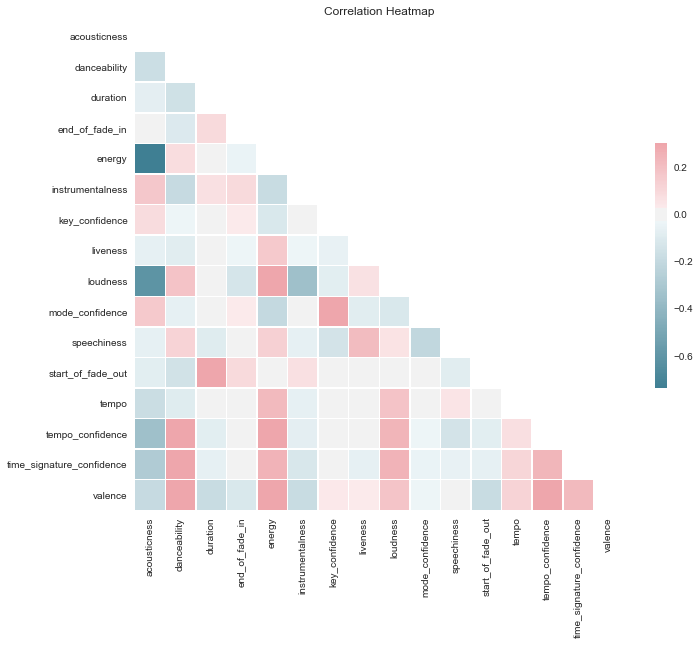

In [44]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Compute the correlation matrix
corr = features[c].corr()

sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
hm=sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

hm.set_title("Correlation Heatmap")

In [45]:
df_grouped = features.groupby(['artist'], as_index=False)[c].mean()

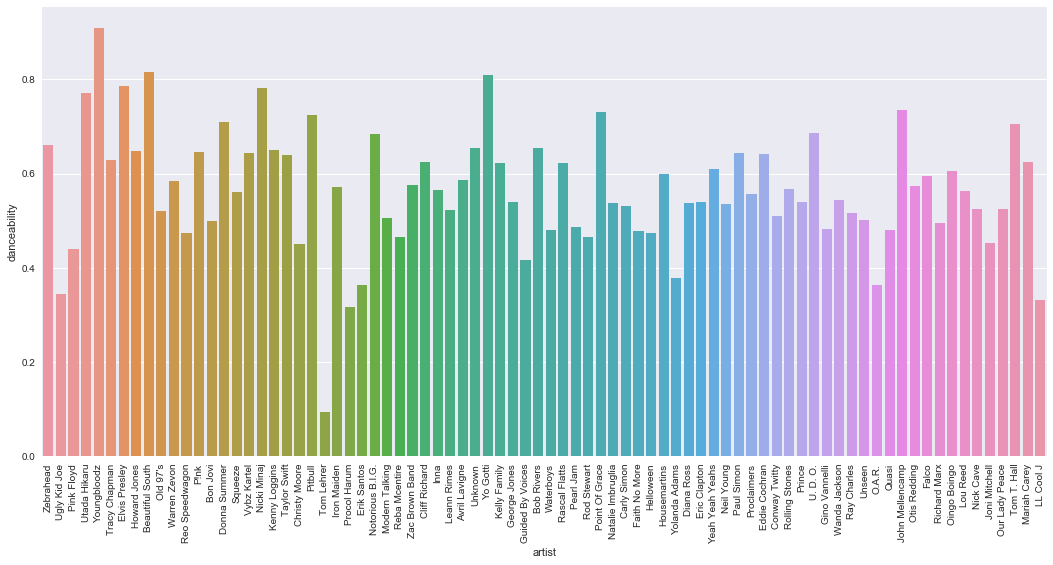

In [53]:
sns.set(rc={'figure.figsize':(18,8.27)})
ax = sns.barplot(x="artist", y="danceability", data=df_grouped.sample(80))

for item in ax.get_xticklabels():
    item.set_rotation(90)

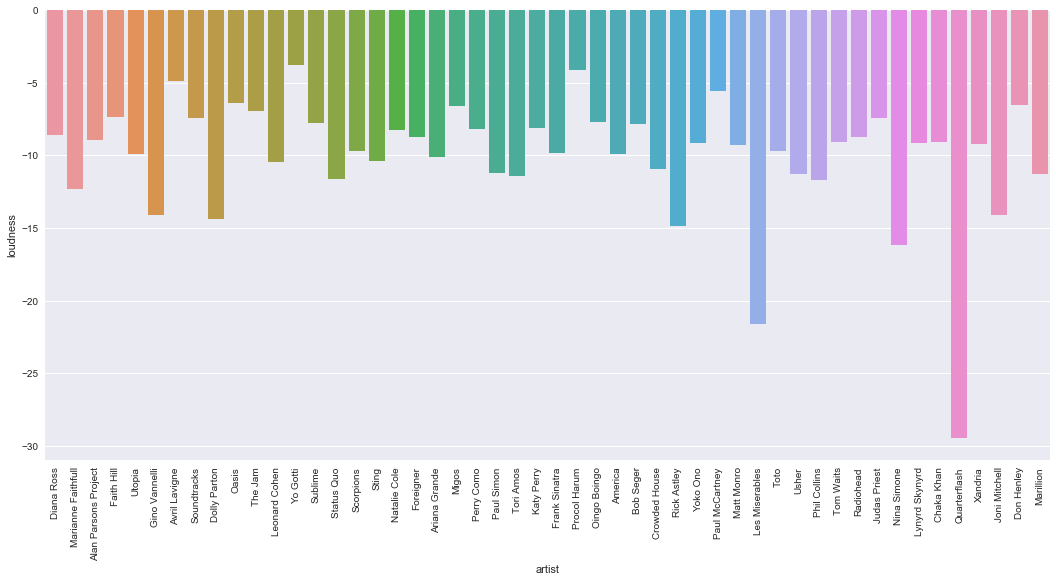

In [54]:
sns.set(rc={'figure.figsize':(18,8.27)})
ax = sns.barplot(x="artist", y="loudness", data=df_grouped.sample(50))

for item in ax.get_xticklabels():
    item.set_rotation(90)

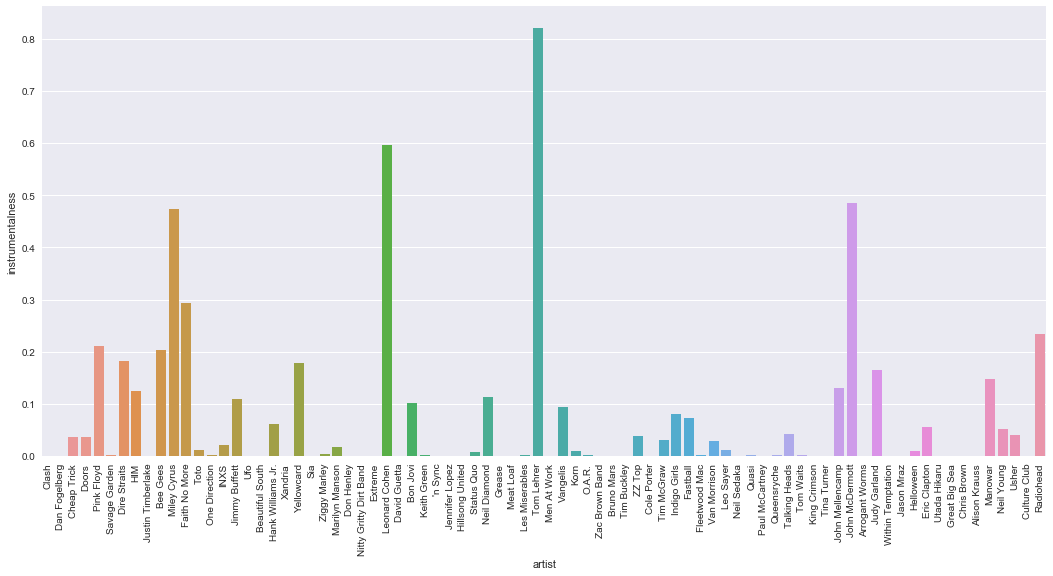

In [55]:
sns.set(rc={'figure.figsize':(18,8.27)})
ax = sns.barplot(x="artist", y="instrumentalness", data=df_grouped.sample(80))

for item in ax.get_xticklabels():
    item.set_rotation(90)

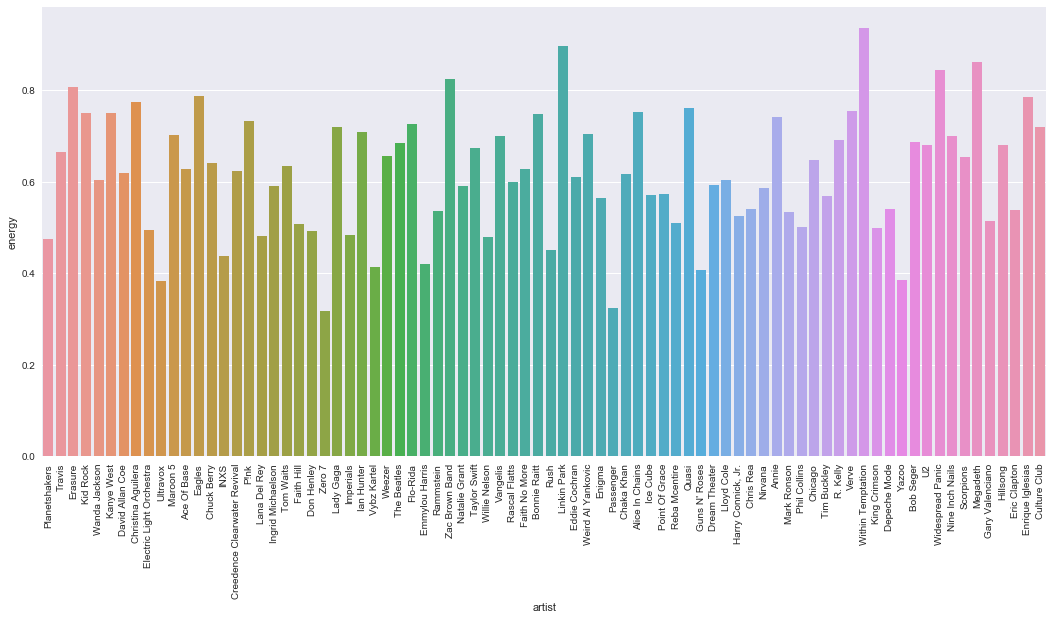

In [56]:
sns.set(rc={'figure.figsize':(18,8.27)})
ax = sns.barplot(x="artist", y="energy", data=df_grouped.sample(80))

for item in ax.get_xticklabels():
    item.set_rotation(90)

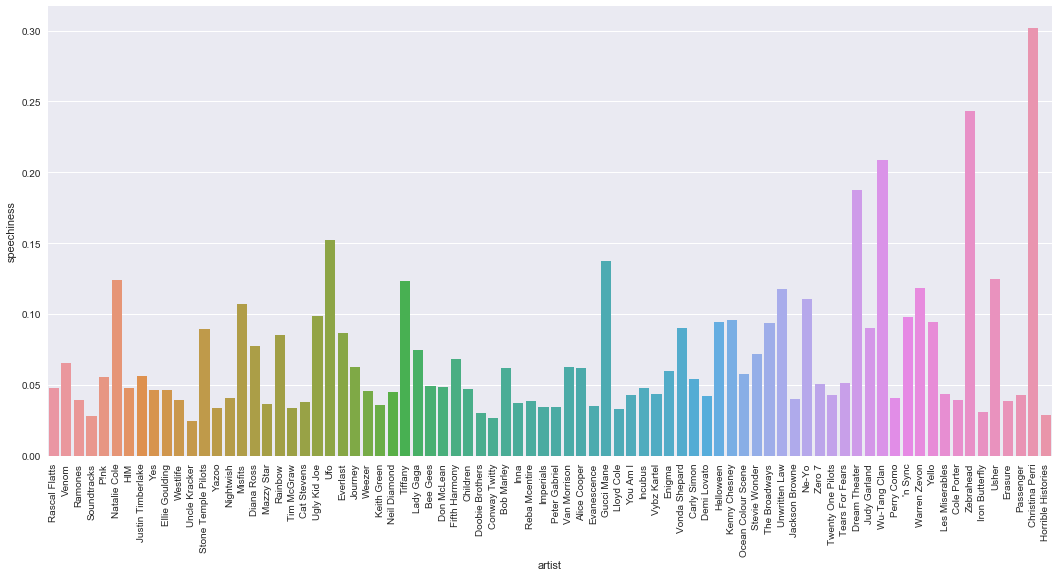

In [57]:
sns.set(rc={'figure.figsize':(18,8.27)})
ax = sns.barplot(x="artist", y="speechiness", data=df_grouped.sample(80))

for item in ax.get_xticklabels():
    item.set_rotation(90)
    

In [68]:
# Getting sentiment for the sample
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
# Getting word vectors
import nltk
nltk.download('punkt')
from nltk.tokenize import RegexpTokenizer


sentiment_data = pd.DataFrame(columns=['positive', 'negative', 'neutral', 'compound', 'song'])
for index, row in lyrics.head(3000).iterrows():
    pos = []
    neg = []
    neu = []
    compound = []
    sentences=nltk.sent_tokenize(row['text'])
    analyzer = SentimentIntensityAnalyzer()
    for sentence in sentences:
        vs = analyzer.polarity_scores(sentence)
        pos.append(vs['pos'])
        neg.append(vs['neg'])
        neu.append(vs['neu'])
        compound.append(vs['compound'])
    tmp = pd.DataFrame([[np.average(pos), np.average(neg), np.average(neu), np.average(compound), row['song']]], columns=['positive', 'negative', 'neutral', 'compound', 'song'])
    sentiment_data = pd.concat([sentiment_data, tmp], ignore_index=True)

[nltk_data] Downloading package punkt to /home/aman/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [70]:
# Merge the dataset to add sentiment calues
df_with_sentiment = pd.merge(features, sentiment_data, how='left', on='song')

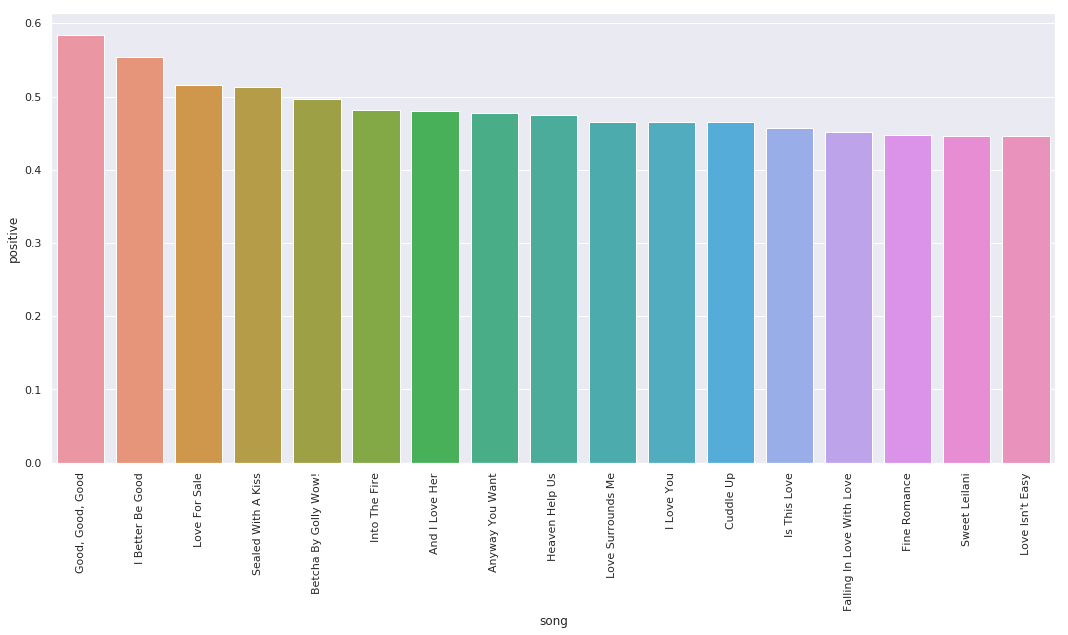

In [76]:
sns.set(rc={'figure.figsize':(18,8.27)})
ax = sns.barplot(x="song", y="positive", data=df_with_sentiment.sort_values('positive', ascending=False).head(20))

for item in ax.get_xticklabels():
    item.set_rotation(90)

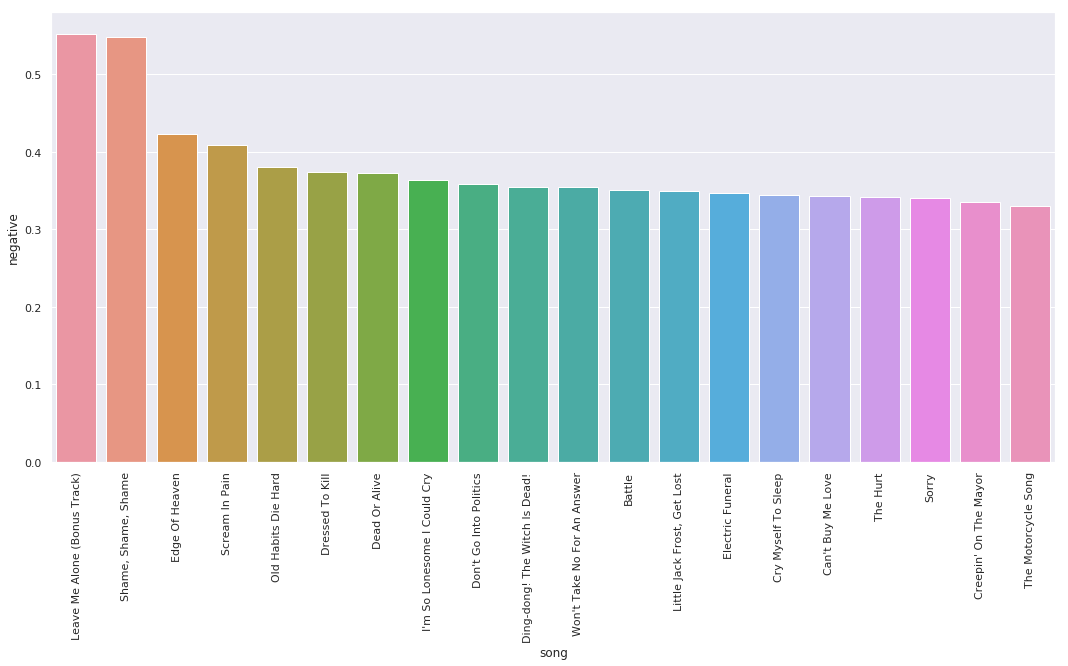

In [77]:
sns.set(rc={'figure.figsize':(18,8.27)})
ax = sns.barplot(x="song", y="negative", data=df_with_sentiment.sort_values('negative', ascending=False).head(20))

for item in ax.get_xticklabels():
    item.set_rotation(90)

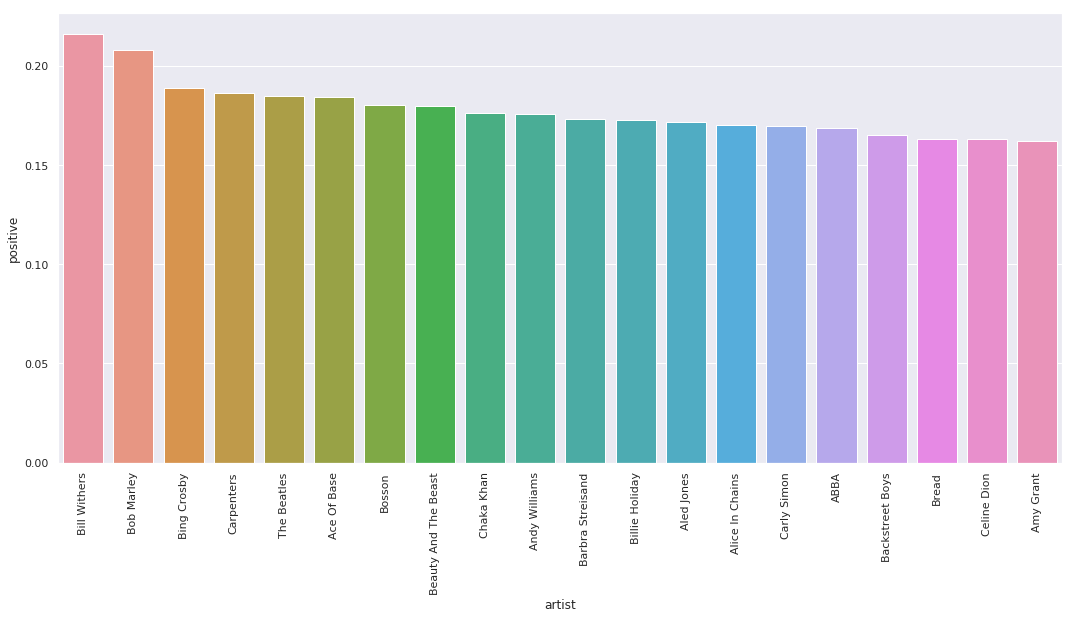

In [79]:
sns.set(rc={'figure.figsize':(18,8.27)})
ax = sns.barplot(x="artist", y="positive", data=df_with_sentiment.groupby('artist', as_index=False)['positive'].mean().sort_values('positive', ascending=False).head(20))

for item in ax.get_xticklabels():
    item.set_rotation(90)

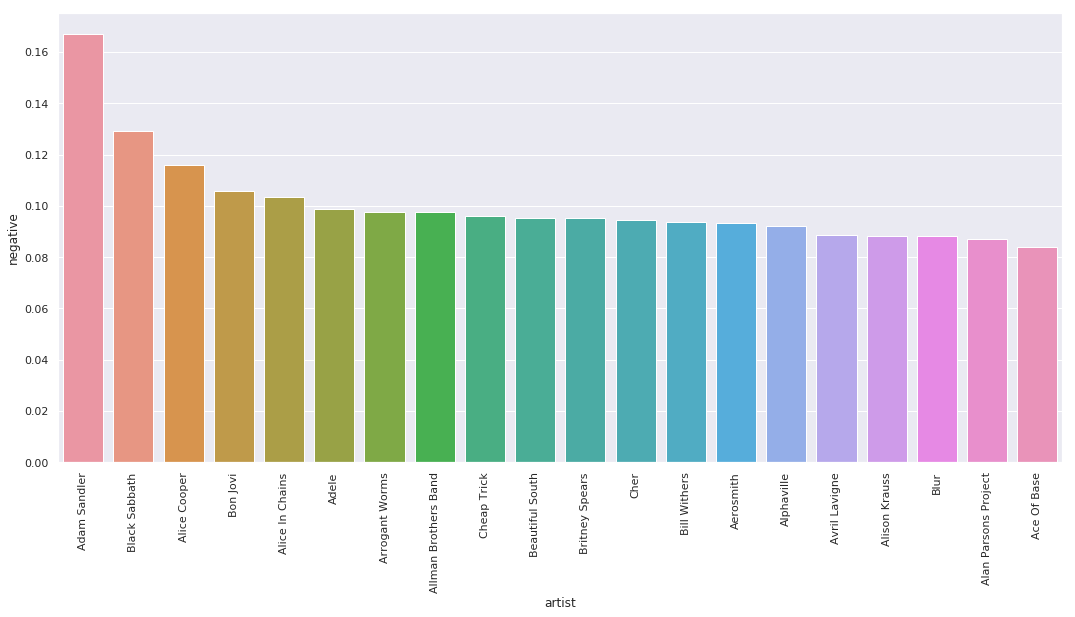

In [81]:
sns.set(rc={'figure.figsize':(18,8.27)})
ax = sns.barplot(x="artist", y="negative", data=df_with_sentiment.groupby('artist', as_index=False)['negative'].mean().sort_values('negative', ascending=False).head(20))

for item in ax.get_xticklabels():
    item.set_rotation(90)

In [8]:
import matplotlib.pyplot as plt
import nltk 

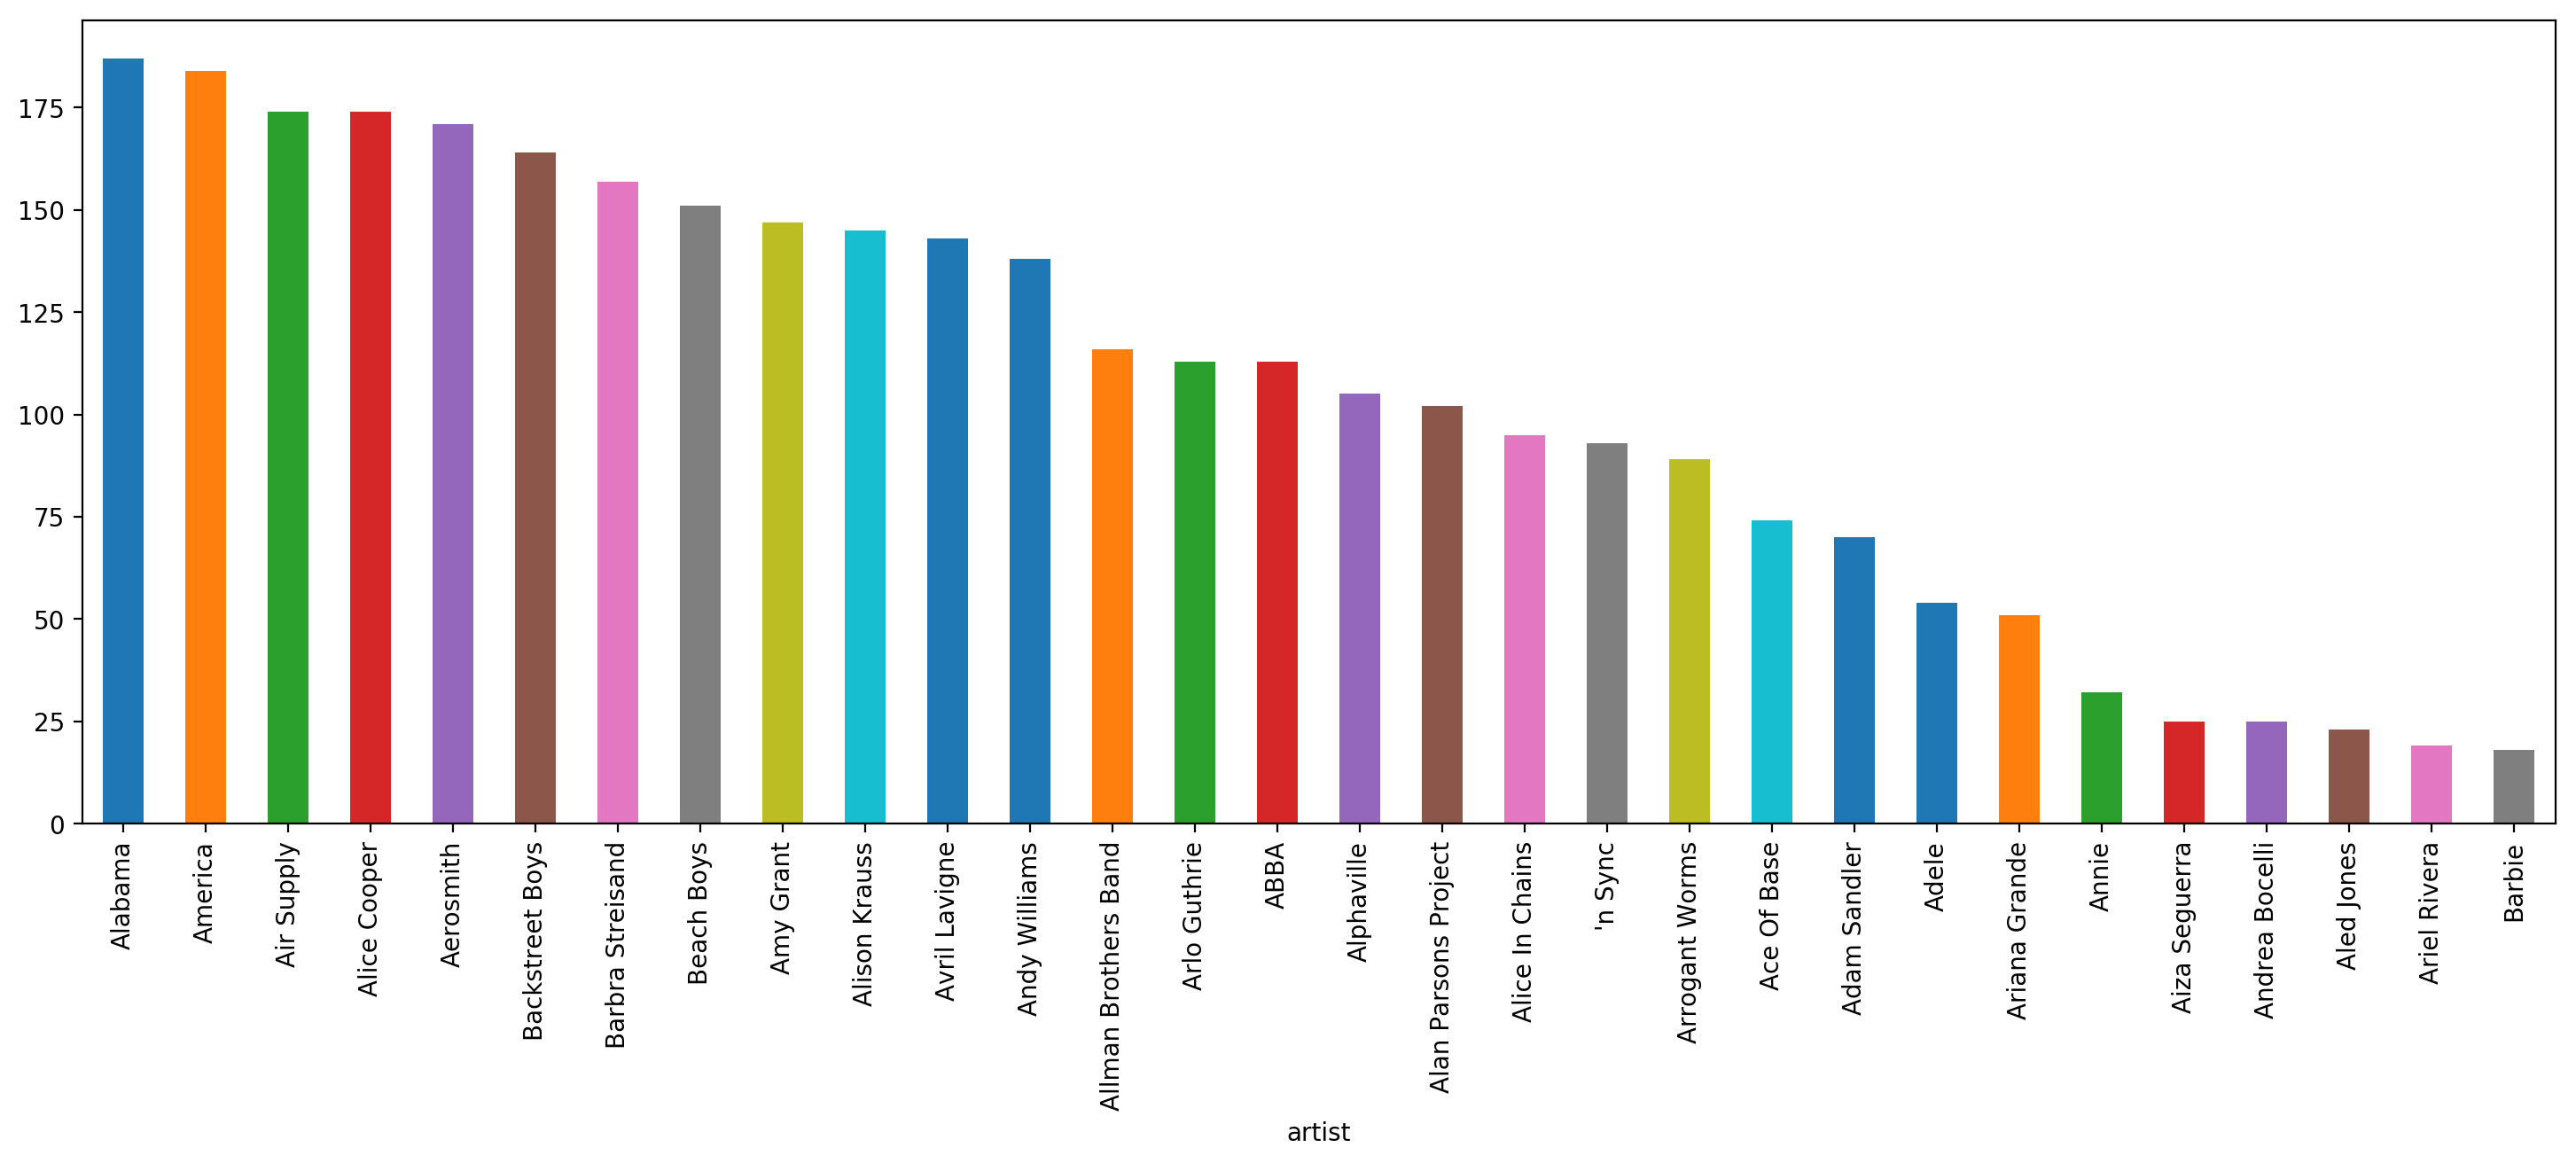

In [9]:
fig=plt.figure(figsize=(18,6), dpi= 200)
lyrics.groupby(['artist'])['text'].count().head(30).sort_values(ascending=False).plot(kind='bar')

In [10]:
#df.text[0].strip().splitlines()
#df.text[0].count('\n')

lyrics['line_count'] = lyrics.apply(lambda _: '', axis=1)

def lines(lyrics_text):
    lines = len("".join([s for s in lyrics_text.strip().splitlines(True) if s.strip()]).splitlines())
    return lines

for i in range(len(lyrics.text)):
    lyrics['line_count'][i] = lines(lyrics.text[i])
    
    

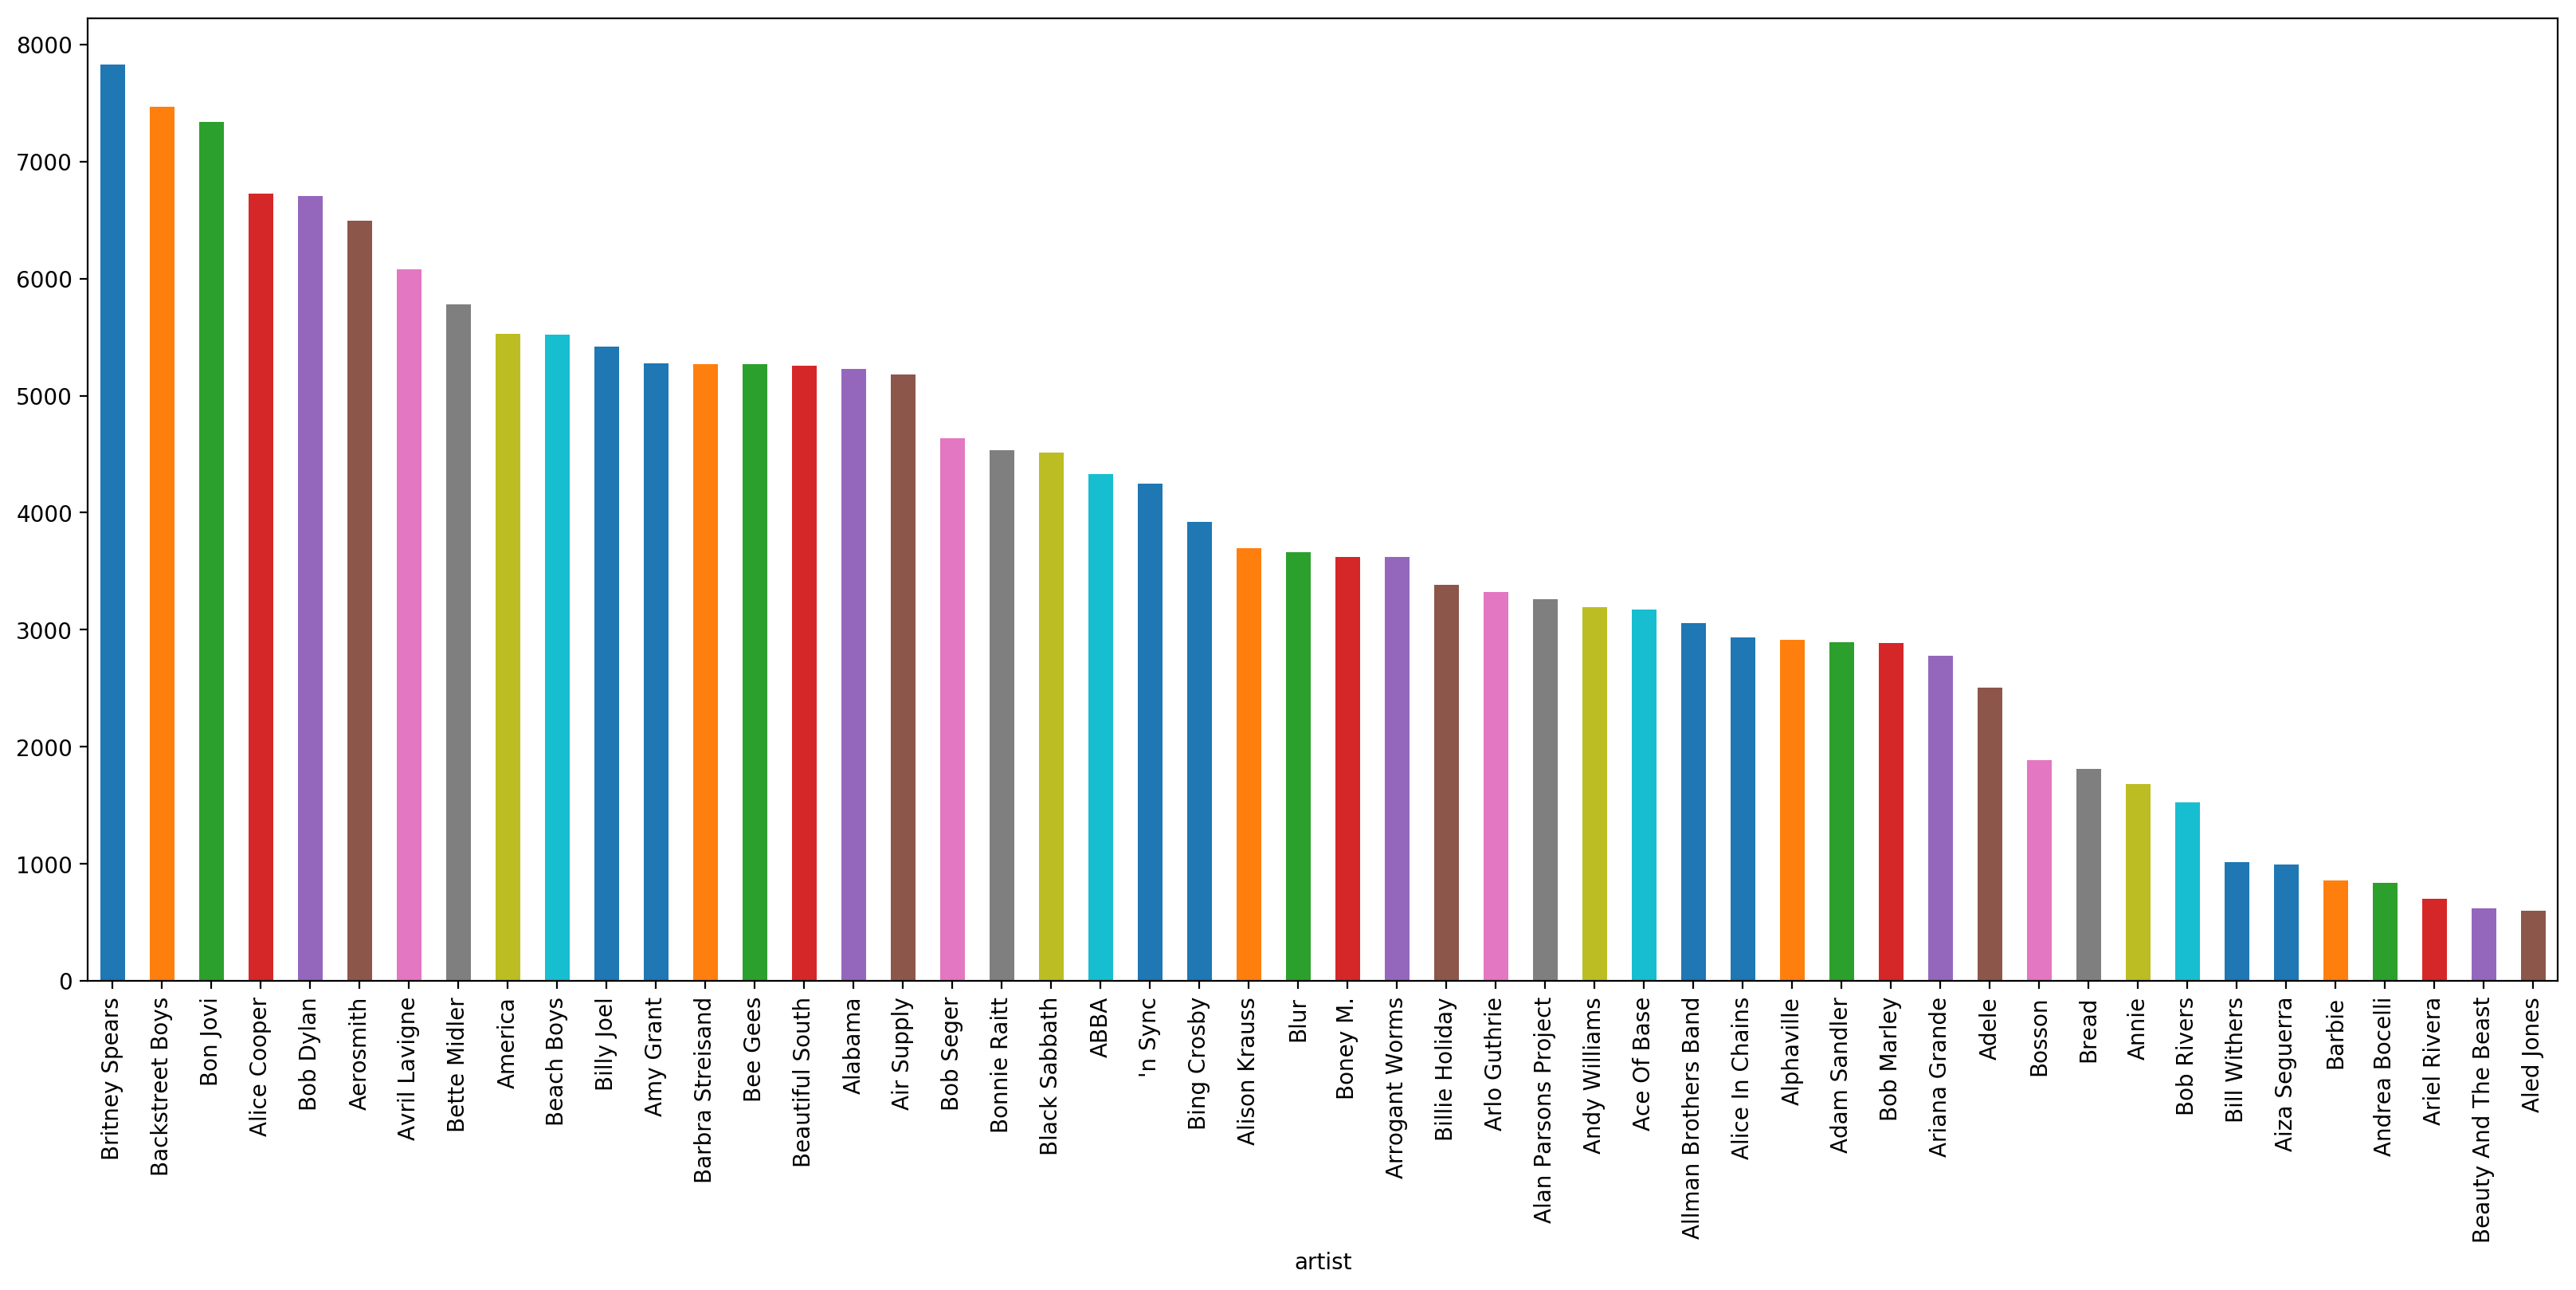

In [12]:
lyrics['word_count'] = lyrics.apply(lambda _: '', axis=1)

for i in range(len(lyrics.text)):
    lyrics.word_count[i] = len(nltk.word_tokenize(lyrics.text[i]))
#df['word_count'] = df.apply(lambda x: len(nltk.word_tokenize(df.text[i]) for i in range len(df.text)))



fig=plt.figure(figsize=(20,8), dpi= 200)
lyrics.groupby(['artist'])['line_count'].sum().head(50).sort_values(ascending=False).plot(kind='bar') 
    

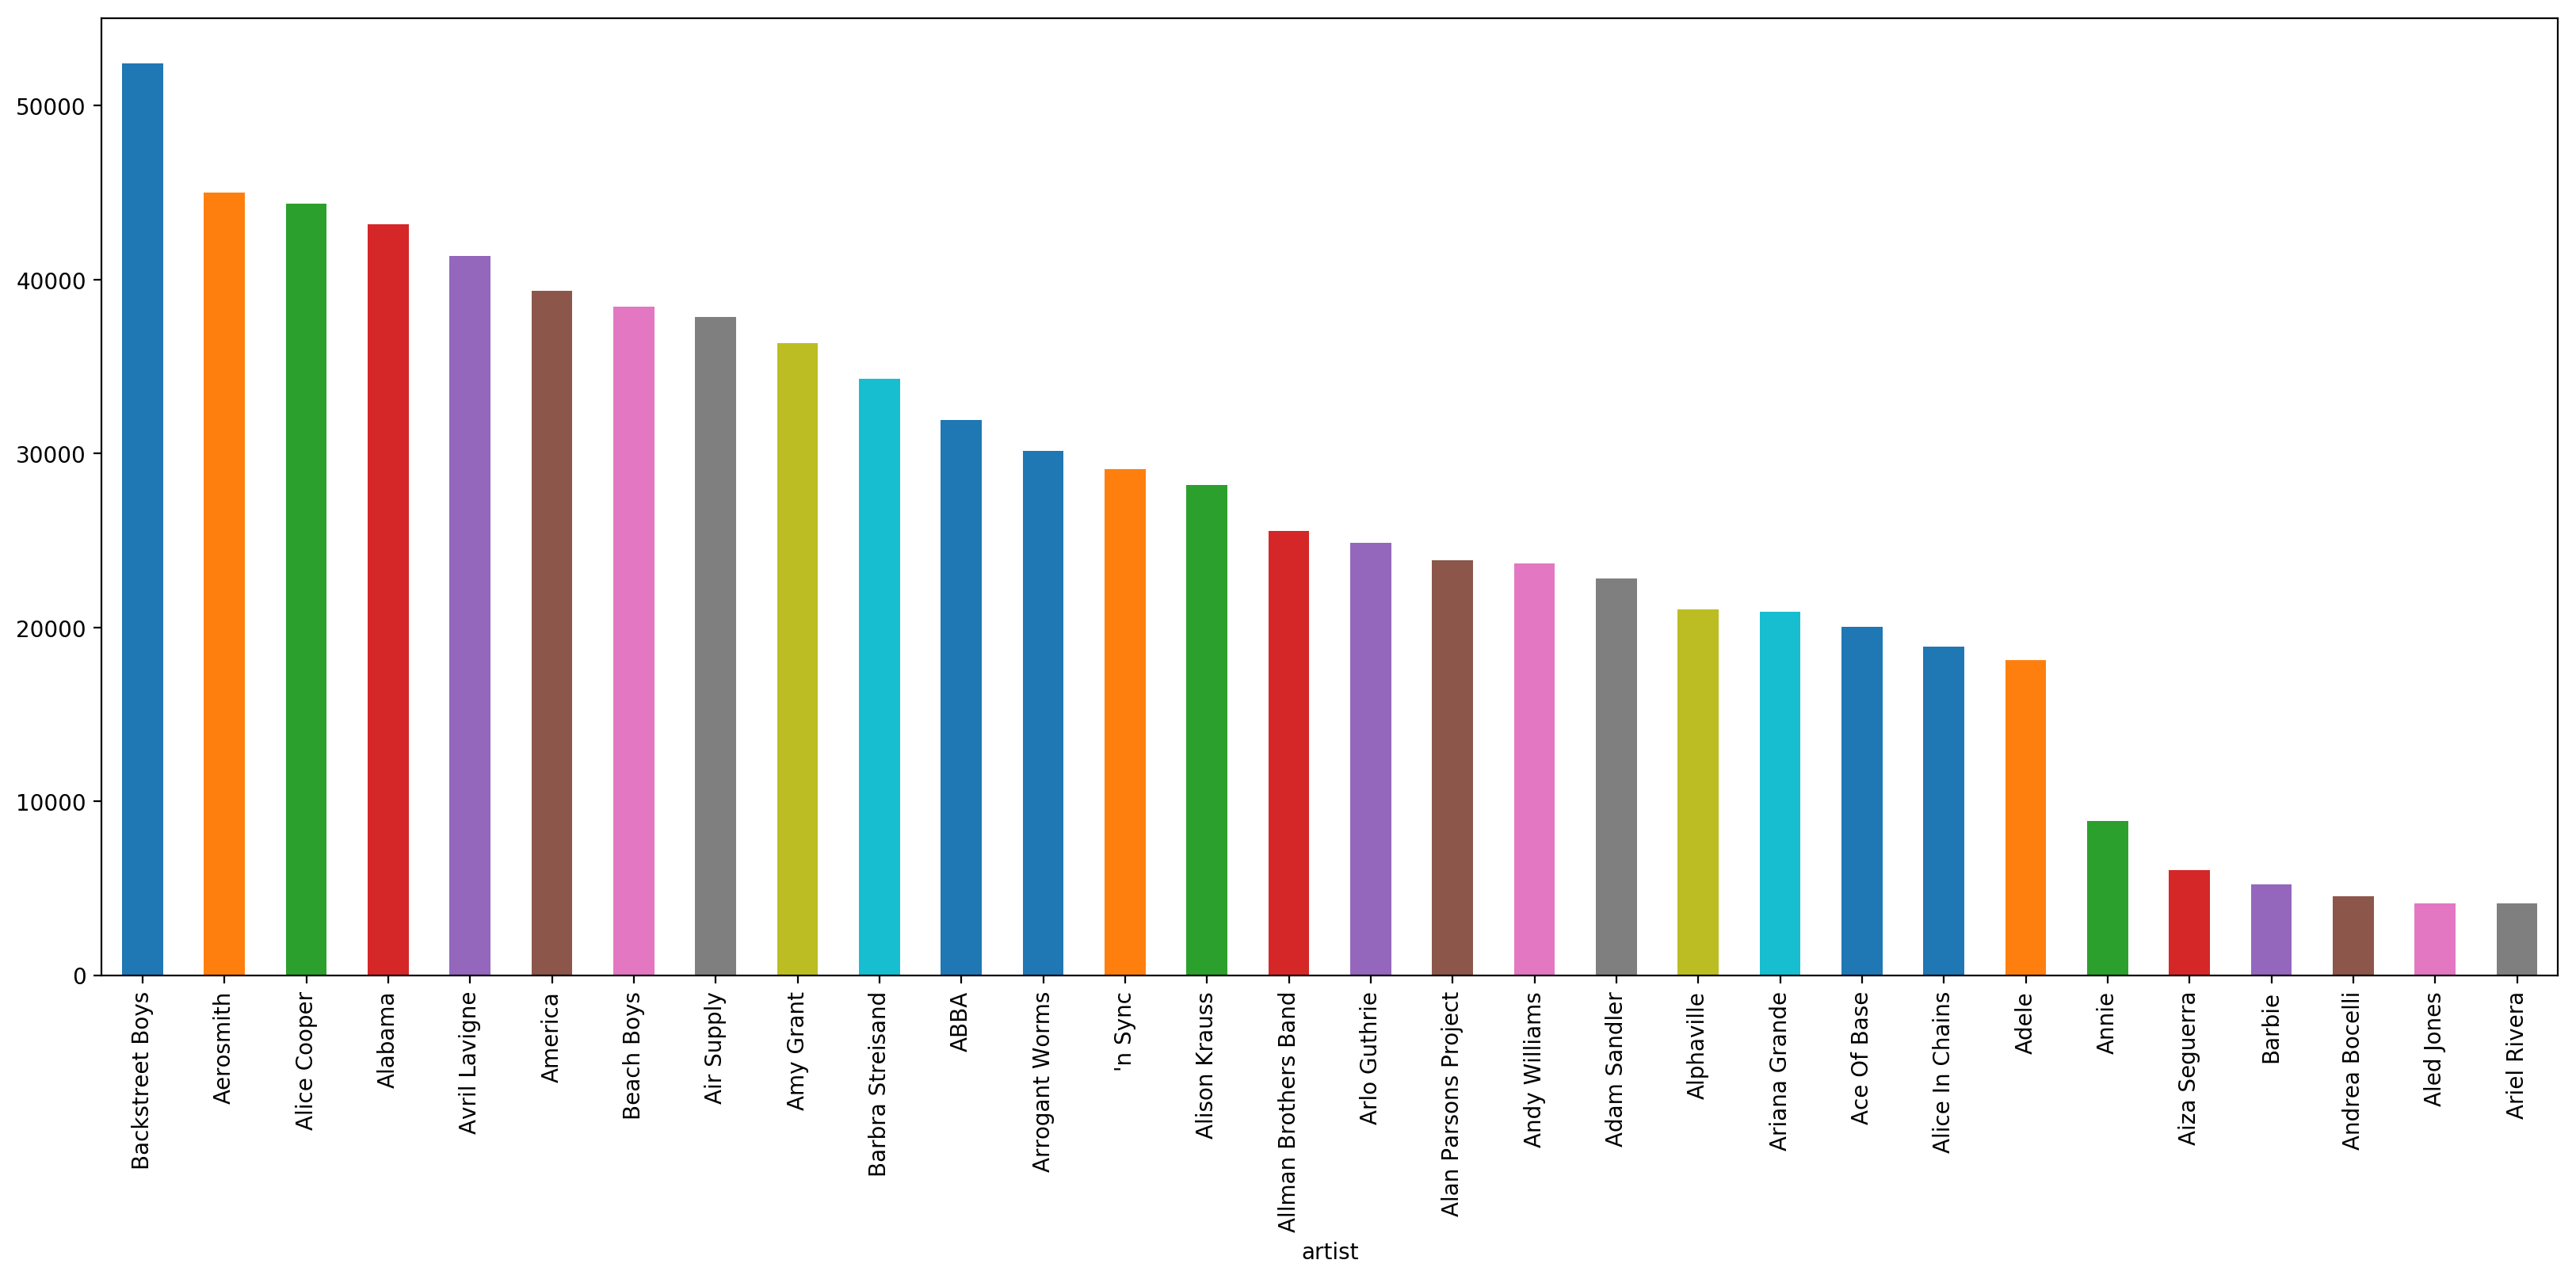

In [13]:
fig=plt.figure(figsize=(20,8), dpi= 200)
lyrics.groupby(['artist'])['word_count'].sum().head(30).sort_values(ascending=False).plot(kind='bar')